## **KSL FINGERSPELLING RECOGNITION**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### INTRODUCTION

<img src="https://github.com/JamesMbeti/KSL-FINGERSPELLING-RECOGNITION/blob/main/ksl.png?raw=1" />

### Overview
- Fingerspelling is a technique that makes use of hand formations to represent words and letters. Using fingerspelling, one can communicate information such as phone numbers, names, and even addresses. However, hearing impaired individuals find it difficult to merge the current technological advancements, such as, smartphones with fingerspelling because they happen to do it a lot faster than their devices. Therefore, there is need to bridge the gap between fingerspelling and typing on smartphones.
- Fingerspelling has grown to become one of the most crucial manual communication systems in the world. For deaf and individuals with hearing impairment issues, fingerspelling is one of the ways that they can communicate with those around them. However, few people are able to discern figerspelling and this leads to communication breakdowns. The use of machine learning technology can help to merge fingerspelling with exact letters and symbols to help enhance communication.

### Problem Statement
- The deaf and hearing impaired community faces significant communication barriers with the rest of the society. This is because sign language is not widely understood by everyone else around them, and this can lead to difficulties in communication or communication breakdowns. To address this issue, this project aims to develop a Convolutional Neural Network (CNN) model specifically designed for fingerspelling recognition, allowing for accurate identification of individual letters and complete words in different sign languages. By improving the recognition of fingerspelling gestures, the model seeks to enhance communication accessibility for individuals who are deaf or hard of hearing, promoting inclusivity and fostering effective communication with the broader society.

### Main Objective
- Our objective is to create an innovative machine learning model that acts as a vital bridge, connecting the deaf and mute community with the wider society.

This model will have the capability to translate various sign languages, including American Sign Language (ASL) and Kenyan Sign Language (KSL), into their corresponding individual letters, enabling the broader community to learn and understand sign language for improved communication with their deaf loved ones. Additionally, this development will empower the deaf and mute community to communicate effectively amongst themselves, fostering inclusivity and enhancing overall interactions. Through this project, we aspire to facilitate seamless communication, foster understanding, and promote inclusiveness between these communities.

## specific objectives
1. Develop a Convolutional Neural Network (CNN) model specifically designed for fingerspelling recognition in different sign languages.
2. Train the model using a large dataset of fingerspelling gestures in various sign languages, ensuring accuracy and reliability in recognizing individual letters and complete words.
3. Conduct extensive testing and evaluation to assess the model's performance and accuracy in recognizing fingerspelling gestures across different sign languages.
4. Deploy the model.

### Data Understanding
- The dataset is publicly available on Kaggle which we then added 379 images taken by the group members doing the fingerspelling.
- The signs provided are based on the Kenyan Sign Language letter database which is made up of 24 classes of letters with the exclusion of `J` and `Z`. The two letters have been excluded because they require the use of motion.
- Further, the dataset is divided into train and test sets each with 27455 and 7172 cases, respectively. The total number of columns for both is 784.

In [35]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array
import cv2
import seaborn as sns
np.random.seed(180)

### kaggle dataset

In [4]:
# Reading train and test dataset
train = pd.read_csv("/content/sign_mnist_train.csv")
test = pd.read_csv("/content/sign_mnist_test.csv")

# printing first five rows of the train data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# a class to decribe the dataset
class Describer:

    #initialize an object
    def __init__(self, df):
        self.df = df

    #checking the shape of the data
    def shape(self, name):
        return print(f"The {name} dataset has {self.df.shape[0]} entries and {self.df.shape[1]} columns")

In [6]:
#Viewing the shape of the train dataset
data = Describer(train)
data.shape("train")

The train dataset has 27455 entries and 785 columns


In [7]:
#Viewing the shape of the test dataset
data = Describer(test)
data.shape("test")

The test dataset has 7172 entries and 785 columns


In [8]:
# Displaying the column names
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

* The pixel columns represent the pixel intensity of an image and the label column represents what letter the image stands for from 0-23.

#### raw dataset

In [9]:
# reading the collected raw images
train_generator = ImageDataGenerator().flow_from_directory("/content/drive/MyDrive/train", target_size=(28,28),
                                                           batch_size=400)

Found 379 images belonging to 24 classes.


In [10]:
#Getting all images and labels
train_images, train_labels = next(train_generator)

In [11]:
#Flattening images into lists of pixels
images_list = []
for img_array in train_images:
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    images_list.append(gray.reshape(-1, 784).flatten().tolist())

In [12]:
#converting the images to a DataFrame
raw_img_df = pd.DataFrame(images_list)
raw_img_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,159.167007,160.167007,160.167007,160.764999,161.776001,161.776001,162.847000,162.559006,153.157013,147.755005,...,113.484001,115.000008,128.000000,116.516006,129.516006,130.559006,132.558990,132.374008,133.003998,133.003998
1,67.274002,67.872002,69.014000,69.498001,70.639999,71.493996,72.277000,73.234001,79.234001,78.234001,...,86.879997,94.723000,98.082001,93.625999,97.458000,108.942001,96.301003,107.540001,122.551003,133.665009
2,160.106003,147.106003,137.052002,136.824005,148.367996,158.314011,157.559006,153.516006,144.516006,146.516006,...,144.337006,146.337006,146.636002,144.636002,144.233994,142.244995,140.244995,142.843002,144.843002,147.441010
3,163.214996,163.214996,162.214996,162.214996,164.214996,166.687988,169.688004,170.688004,166.459991,175.460007,...,160.619003,157.249008,153.249008,148.764999,146.764999,145.807999,150.623001,151.623001,152.552002,153.552002
4,193.039001,194.039001,196.039001,198.511993,202.110001,203.996002,205.354996,206.828003,208.186996,213.899002,...,47.282001,39.656002,45.845001,50.147999,160.162994,190.537003,183.084991,183.540985,183.459015,184.985992


In [13]:
# Generating the labels
train_labels = pd.Series([np.argmax(label) for label in train_labels])

In [14]:
# Concatenating the labels and the raw picture dataframe
raw_df = pd.concat([train_labels, raw_img_df], axis=1)
raw_df.columns = train.columns

#Displaying the first 5 rows of the raw images dataframe
raw_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,17,159.167007,160.167007,160.167007,160.764999,161.776001,161.776001,162.847000,162.559006,153.157013,...,113.484001,115.000008,128.000000,116.516006,129.516006,130.559006,132.558990,132.374008,133.003998,133.003998
1,1,67.274002,67.872002,69.014000,69.498001,70.639999,71.493996,72.277000,73.234001,79.234001,...,86.879997,94.723000,98.082001,93.625999,97.458000,108.942001,96.301003,107.540001,122.551003,133.665009
2,10,160.106003,147.106003,137.052002,136.824005,148.367996,158.314011,157.559006,153.516006,144.516006,...,144.337006,146.337006,146.636002,144.636002,144.233994,142.244995,140.244995,142.843002,144.843002,147.441010
3,2,163.214996,163.214996,162.214996,162.214996,164.214996,166.687988,169.688004,170.688004,166.459991,...,160.619003,157.249008,153.249008,148.764999,146.764999,145.807999,150.623001,151.623001,152.552002,153.552002
4,21,193.039001,194.039001,196.039001,198.511993,202.110001,203.996002,205.354996,206.828003,208.186996,...,47.282001,39.656002,45.845001,50.147999,160.162994,190.537003,183.084991,183.540985,183.459015,184.985992


### Combining the datasets
The kaggle dataset labels are from 0-24 with 9 and 25 missing which represent the j and z letters that have been excluded but the raw dataset labels are from 0-23. For the two datasets to be merged, the labels should be similar.

In [15]:
# mapping the labels into correct labels
mapping_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 10: 9, 11: 10,
                12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19,
                21: 20, 22: 21, 23: 22, 24: 23}

train["label"] = train["label"].map(mapping_dict)
test["label"] = test["label"].map(mapping_dict)

In [16]:
# Concatenating the collected images and the train dataset
train = pd.concat([train, raw_df])
train.reset_index(drop=True, inplace=True)

# Displaying the first five rows
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107.0,118.0,127.0,134.0,139.0,143.0,146.0,150.0,153.0,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155.0,157.0,156.0,156.0,156.0,157.0,156.0,158.0,158.0,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187.0,188.0,188.0,187.0,187.0,186.0,187.0,188.0,187.0,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211.0,211.0,212.0,212.0,211.0,210.0,211.0,210.0,210.0,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,12,164.0,167.0,170.0,172.0,176.0,179.0,180.0,184.0,185.0,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [18]:
df = Describer(train)
df.shape("train")

The train dataset has 27834 entries and 785 columns


The final dataset has 27834 entries and 785 columns.

## Exploratory Data Analysis


In [22]:
def check_missing_values(data):
  return data.isna().sum().sum()

def check_duplicates (data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates




In [23]:
check_missing_values(train)

0

In [24]:
check_duplicates (train)

3

In [27]:
train[train.duplicated(keep=False)]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27486,8,173.072006,173.072006,174.072006,175.072006,175.072006,176.072006,177.071991,177.071991,175.072006,...,82.665001,63.653999,72.355003,67.757004,59.746002,69.148003,138.436005,147.240005,152.229004,147.630997
27489,11,183.040009,182.040009,179.040009,177.039993,176.040009,175.039993,175.039993,176.040009,165.040009,...,55.497002,86.187004,154.990997,172.153992,153.431000,158.833008,163.593994,160.593994,147.665009,128.035004
27529,8,173.072006,173.072006,174.072006,175.072006,175.072006,176.072006,177.071991,177.071991,175.072006,...,82.665001,63.653999,72.355003,67.757004,59.746002,69.148003,138.436005,147.240005,152.229004,147.630997
27648,1,169.072006,170.072006,172.072006,173.072006,172.072006,168.072006,165.072006,162.071991,166.072006,...,62.095001,38.094997,39.094997,38.969997,114.855995,149.845001,149.904999,151.904999,153.779999,155.552002
27666,1,169.072006,170.072006,172.072006,173.072006,172.072006,168.072006,165.072006,162.071991,166.072006,...,62.095001,38.094997,39.094997,38.969997,114.855995,149.845001,149.904999,151.904999,153.779999,155.552002
27758,11,183.040009,182.040009,179.040009,177.039993,176.040009,175.039993,175.039993,176.040009,165.040009,...,55.497002,86.187004,154.990997,172.153992,153.431000,158.833008,163.593994,160.593994,147.665009,128.035004


In [28]:
train = train.drop_duplicates()
check_duplicates (train)

0

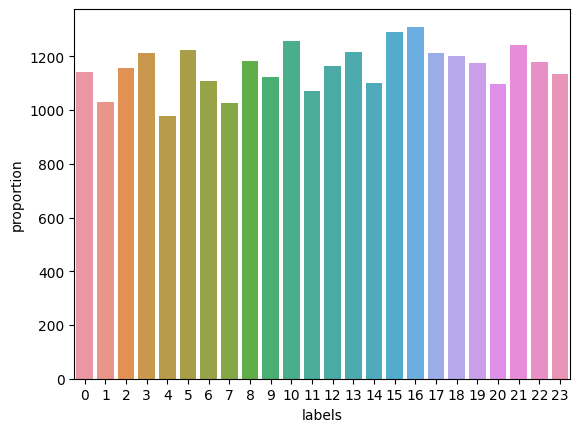

In [36]:
def check_distribution(data, col):
  #d= data[col].value_counts(normalize=True)
  sns.countplot(data=data, x=col)
  plt.xlabel('labels')
  plt.ylabel('proportion')
  plt.show();

check_distribution(train, 'label')

In the analysis conducted, it was found that the label column exhibits a fairly distributed class distribution with no notable class imbalances. All classes display similar proportions, indicating a well-balanced dataset. This characteristic ensures that the model will have an equal opportunity to learn from and make accurate predictions across all classes.

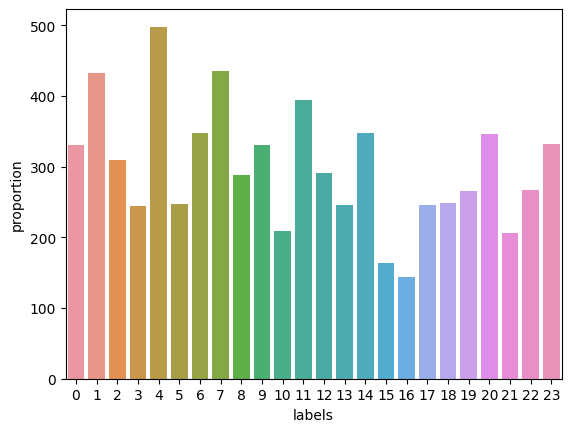

In [37]:
check_distribution(test, 'label')

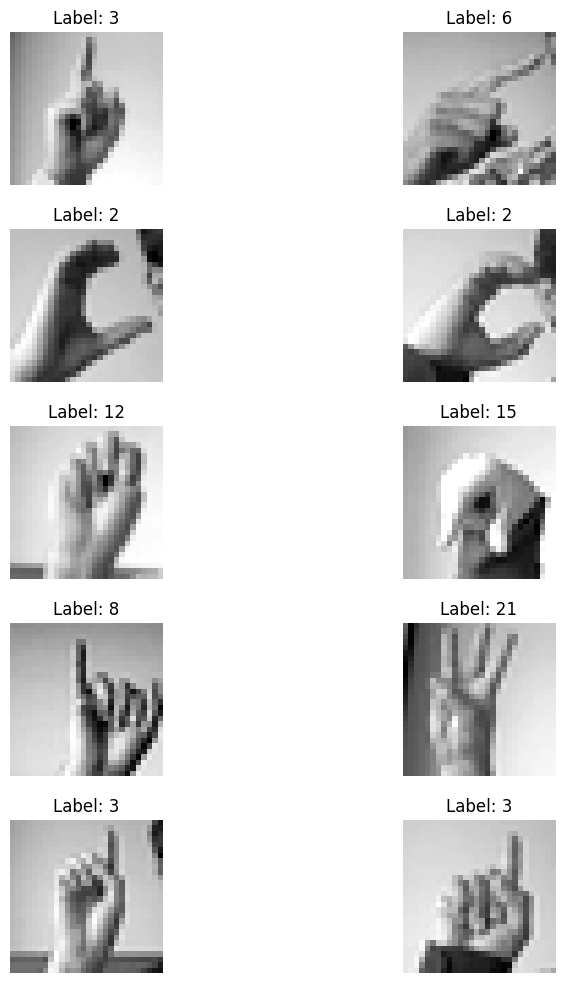

In [40]:
###displaying images
# Extract pixel values and labels
pixel_columns = train.columns[1:]  # Exclude the label column
pixel_values = train[pixel_columns].values
labels = train['label'].values

# Display images
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()

# Display images
for i in range(10):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index

    pixel_array = pixel_values[i].reshape(28, 28)  # Assuming the original image size is 28x28

    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title('Label: ' + str(labels[i]))
    axes[row, col].axis('off')

# Show the plot
plt.show()

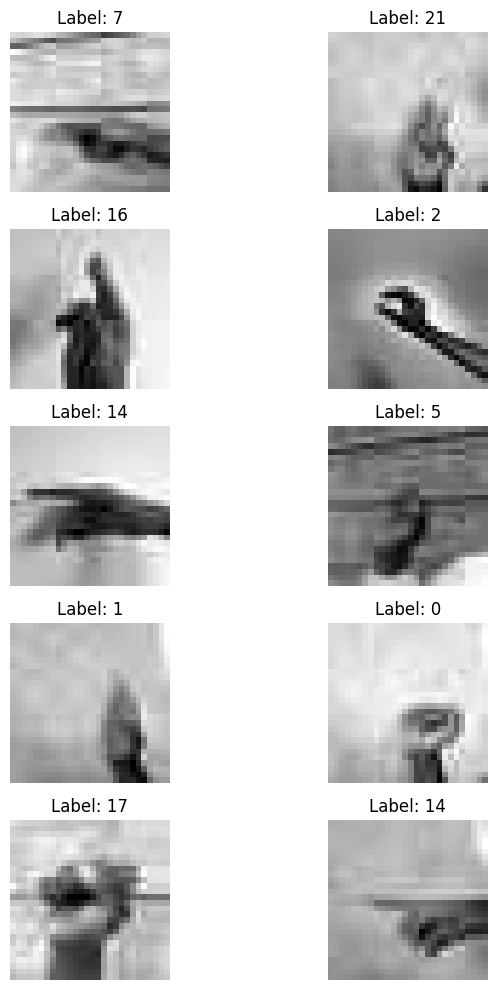

In [41]:
pixel_columns = train.columns[1:]  # Exclude the label column
pixel_values = train[pixel_columns].values
labels = train['label'].values

# Get the last 10 images
last_10_images = pixel_values[-10:]
last_10_labels = labels[-10:]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Display images
for i, ax in enumerate(axes.flat):
    pixel_array = last_10_images[i].reshape(28, 28)  # Assuming the original image size is 28x28

    ax.imshow(pixel_array, cmap='gray')
    ax.set_title('Label: ' + str(last_10_labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.show()